# WeatherPy assessment

Objective of this project is to build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Results observed:
* Temperature (F) vs. Latitude: There is a consistent pattern shown that temperature reduce as latitudes increase in both directions away from 0. 0 is the Equator. Excluding equatorial areas, temperatures are lower in the northern hemisphere compared to the southern hemisphere.
* Humidity (%) vs. Latitude: There is no consistent pattern to establish a relationship. However, the issue here may be with the method chosen to gather data. Since this was based on finding the nearest city to a randomly chosen latitutde and longitude, it is likely that the data set would have more cities along the coasts or on islands (most of the earth is water). A better method to get normally distributed data may give a different analysis.
* Cloudiness (%) vs. Latitude: There is no consistent pattern to establish a relationship.
* Wind Speed (mph) vs. Latitude: There is no consistent pattern to establish a relationship. 

In [14]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import random
import time
from citipy import citipy

#config
from config import api_key

In [15]:
# Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.


#generate a list of atleast 500 unique cities with randomly selected latitudes and longitudes using citipy
random.seed()
city_list = set([])

for i in range(0,1600):
    lat = random.randrange(-90,90,1)
    lng = random.randrange(-180,180,2)
    city = citipy.nearest_city(lat,lng)
    city_list.add(city.city_name+','+city.country_code)
         
len(city_list)
#print(city_list)

627

In [16]:
# retrieve weather data from openweathermap for selected cities


# Build base query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

# intialize collections for retrieved data of interest
cities = []
countries = []
lats = []
lngs = []
dates = []
max_temps = []
cloudiness = []
humidities = []
windspeeds = []
req_count = 0

#iterate over all the randomly selected cities pulling weather data from openweathermap. Control volume not to exceeed API limits
for c in city_list:
    try:  
        city_str = c.replace(' ','+')
        final_url = query_url+city_str
        #print("Attempting to retrieve data for "+city_str)
        print(final_url)
        req_count += 1
        current_weather = requests.get(final_url).json()
        cities.append(current_weather["name"])
        countries.append(current_weather["sys"]["country"])
        dates.append(current_weather['dt'])
        lats.append(current_weather['coord']['lat'])
        lngs.append(current_weather['coord']['lon'])
        max_temps.append(current_weather['main']['temp_max'])
        cloudiness.append(current_weather['clouds']['all'])
        humidities.append(current_weather['main']['humidity'])
        windspeeds.append(current_weather['wind']['speed'])
        #break after every 55 calls to avoid going over limit
        if req_count == 56:
            print('Sleeping for a minute')
            time.sleep(60)
            req_count = 0
       
    except requests.HTTPError as err:
                print('API error for ' + c)
                print(err.reason)
    except KeyError as err:
        print ("Bad data key not found ")
        print(current_weather)
        continue
        
print('************************* Completed data pull *******************')                  

http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=urengoy,ru
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=taveta,ke
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=victoria,sc
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=taybad,ir
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=wakkanai,jp
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=khatanga,ru
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=shiyan,cn
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=qinhuangdao,cn
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q

http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=the+valley,ai
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=tumut,au
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=ahipara,nz
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=samusu,ws
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=springbok,za
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=camana,pe
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=samalaeulu,ws
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://a

http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=port+hardy,ca
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=anito,ph
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=paita,pe
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=olafsvik,is
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=kargopol,ru
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=eura,fi
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=felipe+carrillo+puerto,mx
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=necochea,ar
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=litoral+del+san+juan,co
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=punta+arenas,cl
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=hasaki,jp
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=sao+filipe,cv
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=kaka,tm
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=berberati,cf
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=gigmoto,ph
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=itarema,br
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=el+alto,pe
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=port+blair,in
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=lagoa,pt
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=marcona,pe
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=codrington,ag
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=puerto+ayora,ec
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=kanjiza,rs
Sle

http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=ilulissat,gl
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=yokadouma,cm
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=paralimni,cy
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=dapdap,ph
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=tambacounda,sn
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=buchanan,lr
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=broken+hill,au
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=phan+thiet,vn
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&u

http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=almaznyy,ru
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=nisia+floresta,br
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=divnogorsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=ancud,cl
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=ustyuzhna,ru
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=dickinson,us
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=port+moresby,pg
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=saldanha,za
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1

Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=naruja,ge
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=harper,lr
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=kavieng,pg
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=deming,us
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=havoysund,no
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=lakes+entrance,au
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=dekar,bw
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=cidreira,br
http://api.openweathermap.org/d

http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=port+hedland,au
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=nome,us
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=severnyy,ru
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=mana,gf
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=jinchang,cn
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=sitka,us
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=roros,no
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=port+macquarie,au
http://api.openweathermap.org/da

http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=nizhneyansk,ru
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=ribeira+grande,pt
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=luderitz,na
Sleeping for a minute
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=chokurdakh,ru
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=cap+malheureux,mu
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=kopyevo,ru
Bad data key not found 
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=d2fe63df7207a5dc62fb2a2b5d0ce2e1&units=metric&q=avarua,ck
http://api.openweathermap.org/data/2.

In [17]:
# put data in a dataframe to document, analyze and store

city_df = pd.DataFrame({"city":cities,
                        "country_code":countries,
                       "Lat": lats,
                       "Lng": lngs,
                        "Date": dates,
                        "Max temp": max_temps,
                       "Cloudiness": cloudiness,
                       "Humidity": humidities,
                       "Wind speed": windspeeds})
city_df.to_csv('cityweather.csv')
city_df.head()

,Cloudiness,Date,Humidity,Lat,Lng,Max temp,Wind speed,city,country_code
0,48,1524264333,84,65.96,78.37,-13.83,1.46,Urengoy,RU
1,88,1524264334,98,-3.40,37.67,19.45,0.91,Taveta,KE
2,44,1524261600,94,-4.62,55.45,25.00,1.50,Victoria,SC
3,0,1524264334,80,34.74,60.78,4.30,1.06,Taybad,IR
4,92,1524264334,87,45.41,141.67,7.05,11.61,Wakkanai,JP


# Temperature variance with latitude

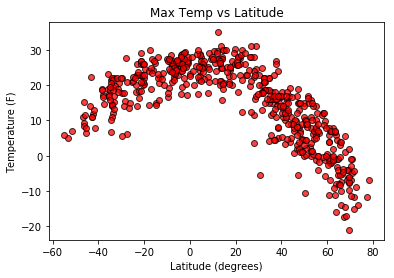

In [18]:
#Plot lat vs max temp
plt.scatter(lats, max_temps, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Temperature (F)")
plt.show()

# Humidity variance with latitude

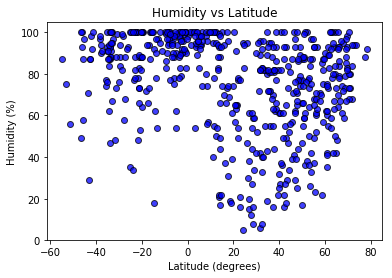

In [19]:
#Plot lat vs humidity
plt.scatter(lats, humidities, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.show()

# Cloudiness variance with latitude

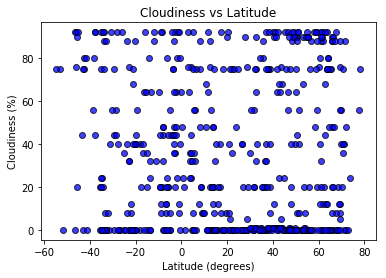

In [20]:
#Plot lat vs cloudiness
plt.scatter(lats, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.show()

# Windspeed variance with latitude

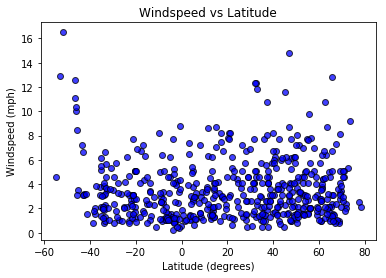

In [21]:
#Plot lat vs cloudiness
plt.scatter(lats, windspeeds, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Windspeed vs Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Windspeed (mph)")
plt.show()